In [2]:
import os 
import numpy as np
import tensorflow
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau
from tqdm.keras import TqdmCallback

/home/jeremy/code/Fed_Learning_Plus/fed_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data_gen=ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.20)


In [11]:
! ls ../dataset/

brain_tumor		 cifar-10-batches-py	 icifar100.py  __pycache__
cifar-100-python	 cifar-10-python.tar.gz  icifar10.py   tumor_dataset.py
cifar-100-python.tar.gz  dataset_factory.py	 icifarn.py


In [12]:
dataset_dir="../dataset/brain_tumor"
TARGET_SIZE=(224,224)
BATCH_SIZE=16

train_cap=data_gen.flow_from_directory(
    dataset_dir,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)
valid_cap=data_gen.flow_from_directory(
    dataset_dir,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 3539 images belonging to 17 classes.
Found 876 images belonging to 17 classes.


In [19]:
train_cap.class_indices

{'Glioma (Astrocitoma, Ganglioglioma, Glioblastoma, Oligodendroglioma, Ependimoma) T1': 0,
 'Glioma (Astrocitoma, Ganglioglioma, Glioblastoma, Oligodendroglioma, Ependimoma) T1C+': 1,
 'Glioma (Astrocitoma, Ganglioglioma, Glioblastoma, Oligodendroglioma, Ependimoma) T2': 2,
 'Meningioma (de Baixo Grau, Atípico, Anaplásico, Transicional) T1': 3,
 'Meningioma (de Baixo Grau, Atípico, Anaplásico, Transicional) T1C+': 4,
 'Meningioma (de Baixo Grau, Atípico, Anaplásico, Transicional) T2': 5,
 'NORMAL T1': 6,
 'NORMAL T2': 7,
 'Neurocitoma (Central - Intraventricular, Extraventricular) T1': 8,
 'Neurocitoma (Central - Intraventricular, Extraventricular) T1C+': 9,
 'Neurocitoma (Central - Intraventricular, Extraventricular) T2': 10,
 'Outros Tipos de Lesões (Abscessos, Cistos, Encefalopatias Diversas) T1': 11,
 'Outros Tipos de Lesões (Abscessos, Cistos, Encefalopatias Diversas) T1C+': 12,
 'Outros Tipos de Lesões (Abscessos, Cistos, Encefalopatias Diversas) T2': 13,
 'Schwannoma (Acustico, 

In [16]:
len(list(train_cap.class_indices.keys()))


17

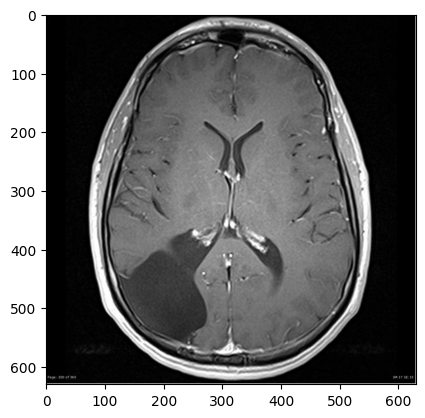

In [26]:
from PIL import Image

img = Image.open('../dataset/tumor/Outros Tipos de Lesões (Abscessos, Cistos, Encefalopatias Diversas) T1C+/outros (3).jpg')
plt.imshow(img)
plt.show()